In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
import math
import random

In [6]:
def get_landing_page_result():
    
    # ------------------------------- DATASET1 -------------------------------------- #
    # load dataset1
    df_node1 = pd.read_csv('df_pos_with_state_clean2.csv')
    df_node1 =  df_node1[['node', 'lat', 'lon', 'city_num','state_num']]
    df_edge1 = pd.read_csv('clean_data_no_latlon.csv')

    # Create Graph
    G1 = nx.from_pandas_edgelist(df_edge1, source='st_id', target='st_tg', edge_attr=['distance', 'train_max_speed', 'arr_time', 'dep_time', 'next_arr_time', 'stay_time', 'travel_time'], 
                                create_using=nx.DiGraph())
    node_attrs1 = df_node1.set_index('node').to_dict('index')
    nx.set_node_attributes(G1, node_attrs1)

    # Get basic graph statistics
    num_nodes1 = G1.number_of_nodes()
    num_edges1 = G1.number_of_edges()

    # Get degree distribution
    degree_dict1 = dict(G1.degree(G1.nodes()))
    degree_values1 = sorted(set(degree_dict1.values()))
    degree_histogram1 = [list(degree_dict1.values()).count(i)/float(nx.number_of_nodes(G1)) for i in degree_values1]

    # Get Density
    density1 = nx.density(G1)

    # Get CC
    cc1 = nx.average_clustering(G1)

    node_feature_list1 = ['node', 'lat', 'lon', 'city_num','state_num']
    edge_feature_list1 = ['distance', 'train_max_speed', 'arr_time', 'dep_time', 'next_arr_time', 'stay_time', 'travel_time']


    # ------------------------------- DATASET2 -------------------------------------- #
    # load dataset2
    df_node2 = pd.read_csv('dataset2_df_nodes_v3.csv')
    df_node2 =  df_node2[['node_id', 'lat', 'lon', 'type_num']]
    df_edge2 = pd.read_csv('dataset2_df_edges_v3.csv')
    
    # Create Graph
    G2 = nx.from_pandas_edgelist(df_edge2, source='source', target='target', edge_attr=['distance', 'type_num'], create_using=nx.DiGraph())
    node_attrs2 = df_node2.set_index('node_id').to_dict('index')
    nx.set_node_attributes(G2, node_attrs2)

    # Get basic graph statistics
    num_nodes2 = G2.number_of_nodes()
    num_edges2 = G2.number_of_edges()

    # Get degree distribution
    degree_dict2 = dict(G2.degree(G2.nodes()))
    degree_values2 = sorted(set(degree_dict2.values()))
    degree_histogram2 = [list(degree_dict2.values()).count(i)/float(nx.number_of_nodes(G2)) for i in degree_values2]

    # Get Density
    density2 = nx.density(G2)

    # Get CC
    cc2 = nx.average_clustering(G2)

    node_feature_list2 = ['node_id', 'lat', 'lon', 'type_num']
    edge_feature_list2 = ['distance', 'type_num']
    
    return num_nodes1, num_edges1, density1, cc1, degree_values1, degree_histogram1, node_feature_list1, edge_feature_list1, num_nodes2, num_edges2, density2, cc2, degree_values2, degree_histogram2, node_feature_list2, edge_feature_list2

In [10]:
def main():
    num_nodes1, num_edges1, density1, cc1, degree_values1, degree_histogram1, node_feature_list1, edge_feature_list1, num_nodes2, num_edges2, density2, cc2, degree_values2, degree_histogram2, node_feature_list2, edge_feature_list2 = get_landing_page_result()

    print(f'dataset 1: Chinese Railway Dataset')

    print(f"Number of nodes: {num_nodes1}")
    print(f"Number of edges: {num_edges1}")
    print(f"Number of Density: {density1}")
    print(f"Number of cc: {cc1}")

    # Plot degree distribution (linear)
    print(f"Network1 degree distribution plot (linear)")
    plt.plot(degree_values1, degree_histogram1, 'o-', linewidth=2)
    plt.xlabel('Degree')
    plt.ylabel('Fraction of Nodes')
    plt.title('Degree Distribution')
    plt.show()
    plt.clf()

    # Plot degree distribution (log-log)
    print(f"Network1 degree distribution plot (log-log)")
    plt.loglog(degree_values1, degree_histogram1, 'o-', linewidth=2)
    plt.xlabel('Degree')
    plt.ylabel('Fraction of Nodes')
    plt.title('Degree Distribution')
    plt.show()
    plt.clf()

    print('--------------------------------------------------------')

    print(f'dataset 1: Paris Multilayer Transport Dataset')
    print(f"Number of nodes: {num_nodes2}")
    print(f"Number of edges: {num_edges2}")
    print(f"Number of Density: {density2}")
    print(f"Number of cc: {cc2}")

    # Plot degree distribution (linear)
    print(f"Network2 degree distribution plot (linear)")
    plt.plot(degree_values2, degree_histogram2, 'o-', linewidth=2)
    plt.xlabel('Degree')
    plt.ylabel('Fraction of Nodes')
    plt.title('Degree Distribution')
    plt.show()
    plt.clf()

    # Plot degree distribution (log-log)
    print(f"Network2 degree distribution plot (log-log)")
    plt.loglog(degree_values2, degree_histogram2, 'o-', linewidth=2)
    plt.xlabel('Degree')
    plt.ylabel('Fraction of Nodes')
    plt.title('Degree Distribution')
    plt.show()
    plt.clf()

dataset 1: Chinese Railway Dataset
Number of nodes: 2719
Number of edges: 10789
Number of Density: 0.0014598980655843206
Number of cc: 0.3776427564984455
Network1 degree distribution plot (linear)


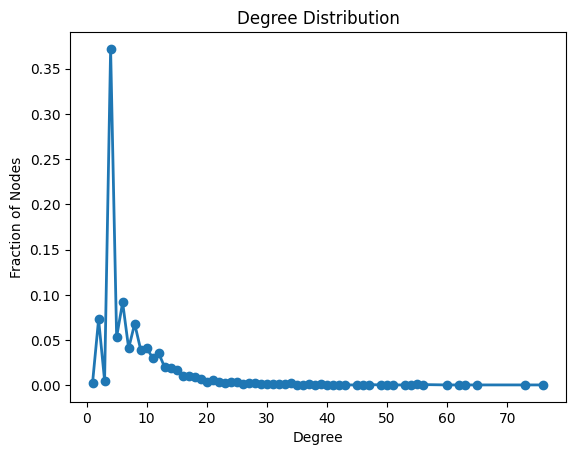

Network1 degree distribution plot (log-log)


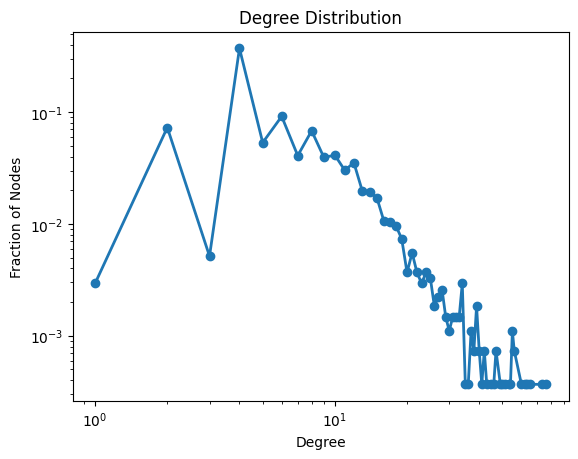

--------------------------------------------------------
dataset 1: Paris Multilayer Transport Dataset
Number of nodes: 12237
Number of edges: 40533
Number of Density: 0.000270703780139563
Number of cc: 0.13916844404059348
Network2 degree distribution plot (linear)


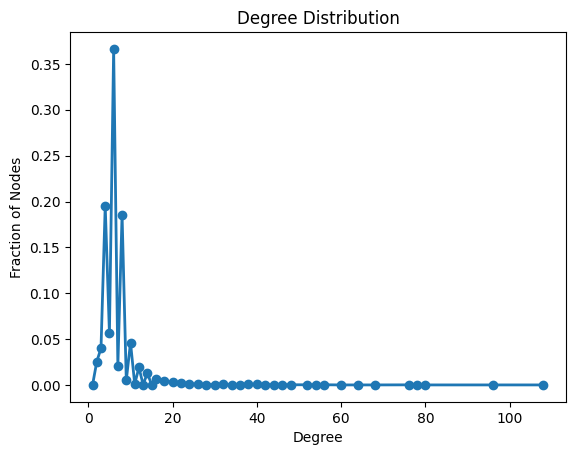

Network2 degree distribution plot (log-log)


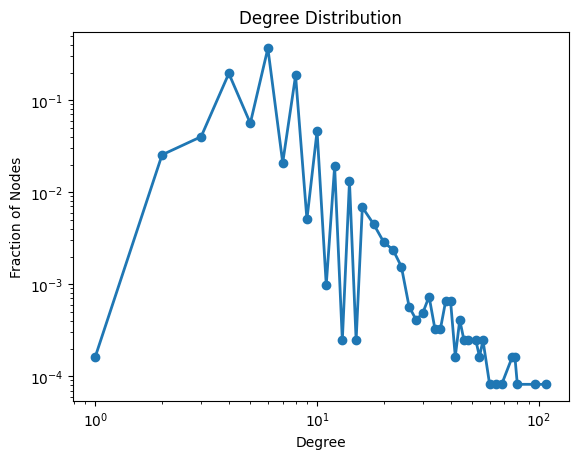

<Figure size 640x480 with 0 Axes>

In [11]:
main()